<a href="https://colab.research.google.com/github/krishit-banik/customer-churn-predictor/blob/main/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Preprocessing

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
dataset=pd.read_csv('/content/Churn-Modelling.csv')

# Data Exploration

In [115]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [116]:
dataset.shape

(10000, 14)

In [117]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [118]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [119]:
len(dataset.select_dtypes(include='object').columns)

3

In [120]:
dataset.select_dtypes(include='int64').columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
      dtype='object')

In [121]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

11

In [122]:
#statistical summary
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with missing data

In [123]:
dataset.isnull().values.any()

np.False_

In [124]:
dataset.isnull().values.sum()

np.int64(0)

# Encode the categorical data

In [125]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [126]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [127]:
dataset=dataset.drop(columns=['RowNumber','CustomerId','Surname'])

In [128]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [129]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [130]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [131]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [132]:
numeric_cols = dataset.select_dtypes(include=['number']).columns
dataset.groupby('Geography')[numeric_cols].mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [133]:
dataset.groupby('Gender')[numeric_cols].mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [134]:
datset=pd.get_dummies(data=dataset,drop_first=True)

In [135]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Countplot

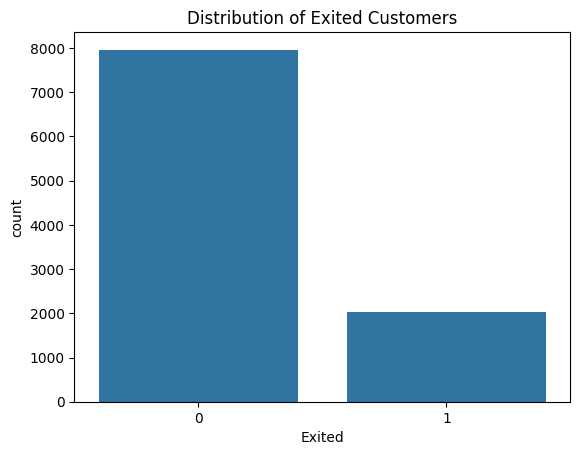

In [136]:
sns.countplot(x='Exited', data=dataset)
plt.title("Distribution of Exited Customers")
plt.show()

In [137]:
# Staying with the bank
(dataset.Exited == 0).sum()

np.int64(7963)

In [138]:
# Left the bank
(dataset.Exited == 1).sum()

np.int64(2037)

# Corelation matrix and heatmap

In [139]:
dataset_2=dataset.drop(columns='Exited')

<Axes: title={'center': 'Correlation with Exited'}>

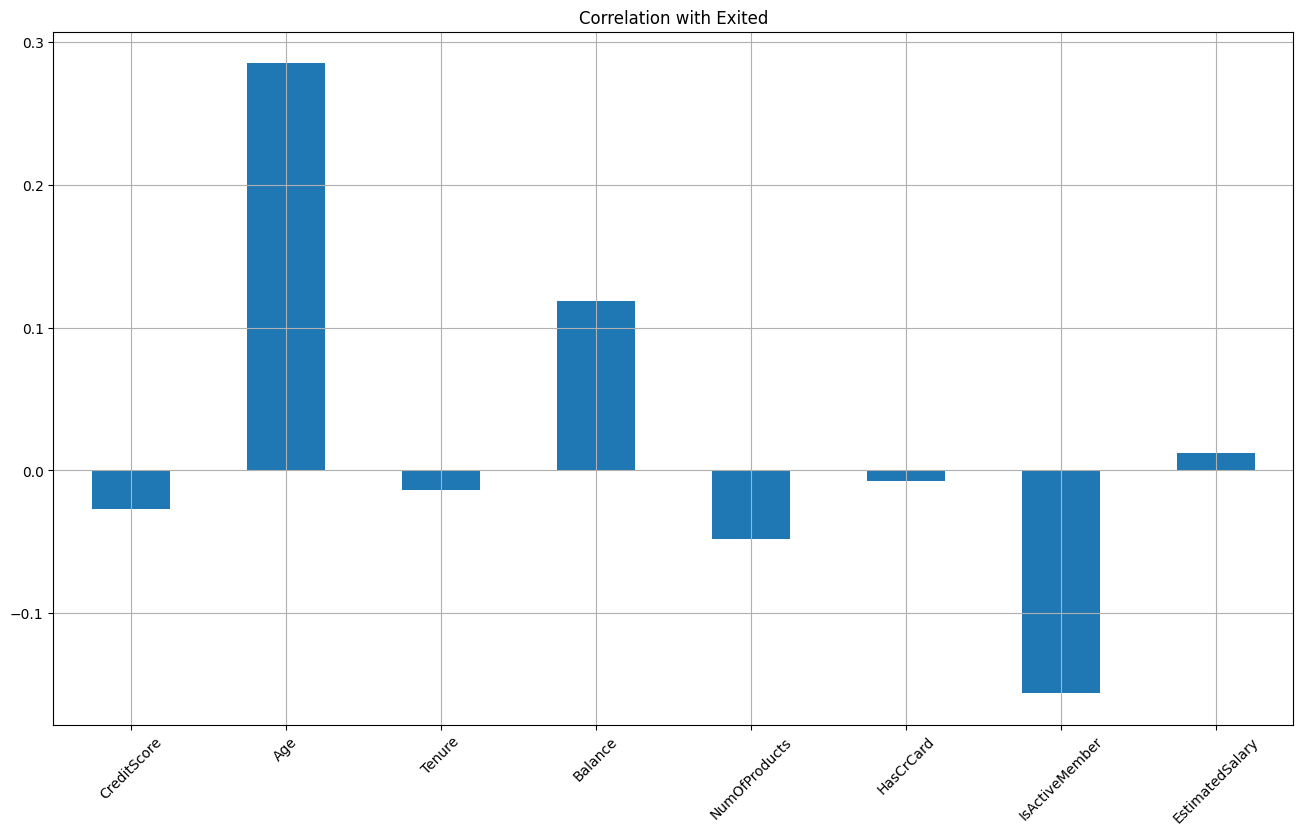

In [140]:
corr = dataset_2.select_dtypes(include='number').corrwith(dataset['Exited'])

corr.plot.bar(
    figsize=(16, 9),
    title="Correlation with Exited",
    rot=45,
    grid=True
)


In [141]:
corr = dataset.select_dtypes(include='number').corr()


<Axes: >

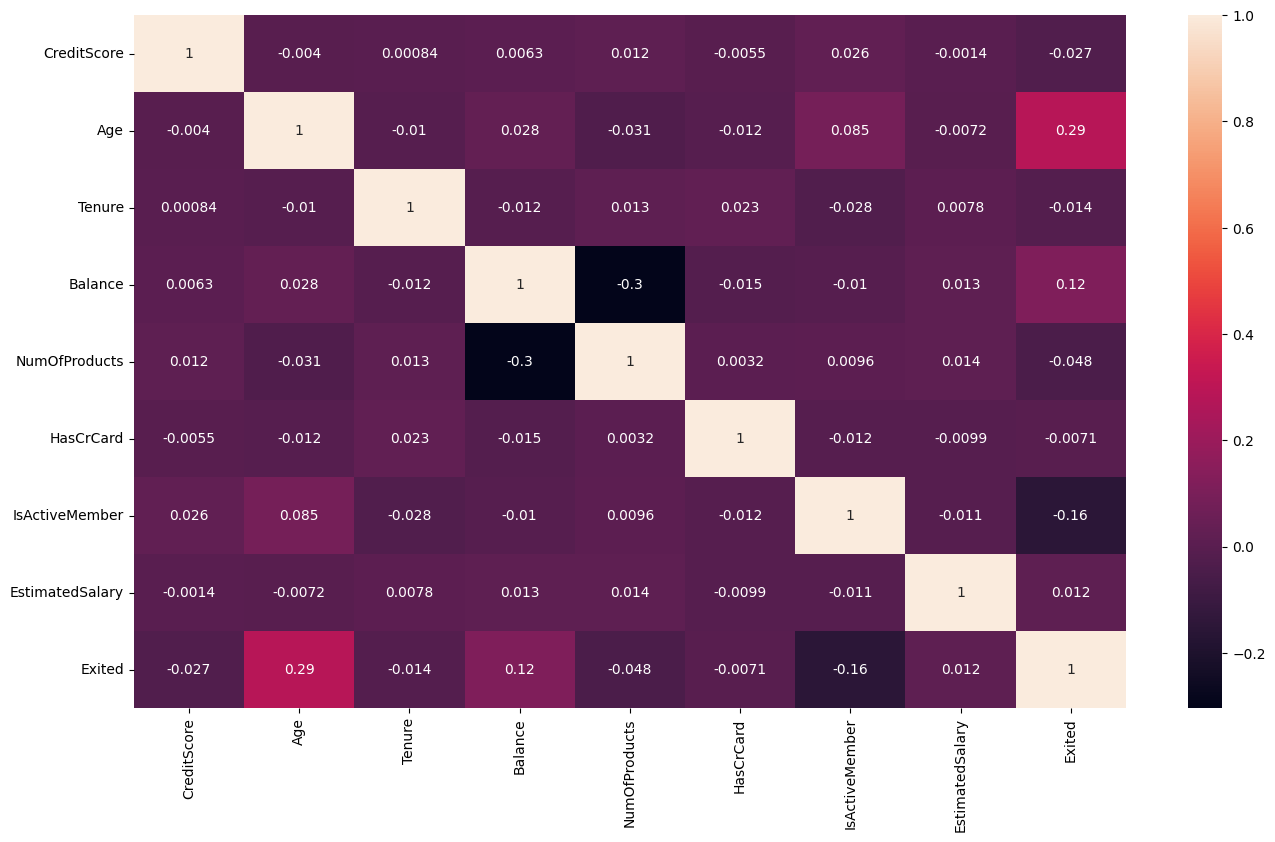

In [142]:
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)

# Spliting the dataset

In [143]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [144]:
x=dataset.drop(columns='Exited')

In [145]:
# Dependant Variable
y=dataset['Exited']

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [148]:
x_train.shape

(8000, 10)

In [149]:
x_test.shape

(2000, 10)

In [150]:
y_train.shape

(8000,)

In [151]:
y_test.shape

(2000,)

# Feature Scaling

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
sc = StandardScaler()

In [154]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [155]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [156]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Part 2: Building the model

# Logistic regression

In [157]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [158]:
y_pred=classifier_lr.predict(x_test)

In [164]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix




In [160]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

In [161]:
results = pd.DataFrame([['Logistic Regression', acc, f1, precision, recall]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [162]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [165]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


# cross validation

In [167]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_lr, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.85 %
Standard Deviation: 0.86 %


# Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [169]:
y_pred=classifier_rf.predict(x_test)

In [170]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix

In [178]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

In [172]:
model_results = pd.DataFrame([['Random Forest', acc, f1, precision, recall]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [181]:
results = pd.concat([results, model_results], ignore_index=True)


In [182]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1512   83]
 [ 206  199]]


# Cross validation

In [183]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_rf, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.11 %
Standard Deviation: 1.10 %


# XG Boost Classifier

In [184]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [185]:
y_pred=classifier_xgb.predict(x_test)

In [187]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, f1, precision, recall]],
                             columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

results = pd.concat([results, model_results], ignore_index=True)

print(results)

           Model  Accuracy  F1 Score  Precision    Recall
0  Random Forest    0.8110  0.336842   0.581818  0.237037
1  Random Forest    0.8110  0.336842   0.581818  0.237037
2  Random Forest    0.8110  0.336842   0.581818  0.237037
3  Random Forest    0.8110  0.336842   0.581818  0.237037
4  Random Forest    0.8110  0.336842   0.581818  0.237037
5        XGBoost    0.8485  0.584362   0.657407  0.525926


In [188]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1484  111]
 [ 192  213]]


# cross validation

In [189]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_xgb, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.82 %
Standard Deviation: 1.31 %


# Randomized Search to find the best parameter

In [191]:
from sklearn.model_selection import RandomizedSearchCV


In [192]:
parameters={
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}




In [193]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [194]:
randomized_search=RandomizedSearchCV(estimator=classifier_xgb,param_distributions=parameters,n_iter=5,n_jobs=-1,scoring='roc_auc',cv=5,verbose=3)

In [195]:
randomized_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [196]:
randomized_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [197]:
randomized_search.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [198]:
randomized_search.best_score_

np.float64(0.8600446227913657)

# Final Model XG boost classifier

In [203]:
from xgboost import XGBClassifier
classifier = XGBClassifier(
    colsample_bytree=0.5,
    gamma=0.3,
    learning_rate=0.3,
    max_depth=3,
    min_child_weight=1,
    missing=np.nan
)

classifier.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [204]:
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
model_results = pd.DataFrame([['Final XGBoost', acc, f1, precision, recall]],
                             columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

results = pd.concat([results, model_results], ignore_index=True)
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.8110,0.336842,0.581818,0.237037
1,Random Forest,0.8110,0.336842,0.581818,0.237037
2,Random Forest,0.8110,0.336842,0.581818,0.237037
3,Random Forest,0.8110,0.336842,0.581818,0.237037
4,Random Forest,0.8110,0.336842,0.581818,0.237037
5,XGBoost,0.8485,0.584362,0.657407,0.525926
6,Final XGBoost,0.8615,0.609309,0.710526,0.533333


In [205]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1507   88]
 [ 189  216]]


# cross validation

In [207]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))


Accuracy: 86.36 %
Standard Deviation: 1.18 %


# Predicting a single observation

In [208]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [209]:
single_obs =[[625 ,	45	,5	,12500.00	,1	,0	,1	,101348.88	,1]]

In [210]:
single_obs

[[625, 45, 5, 12500.0, 1, 0, 1, 101348.88, 1]]

In [218]:
classifier.predict(sc.transform(single_obs))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])